# Import Libraries and load data 

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#SK Learn 
#You'll notice that some of the modules have from sklearn in portions of the import statements. 
#This is because we need to specify where the needed function "lives" before importing it.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.datasets import load_digits

#give full path of where your data file 
data = pd.read_csv('Demographic_Data (1).csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


## Data Analysis 

In [2]:
#useful code for overview of your data 
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [3]:
#helps get data type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
#drops all duplicates - looks like this data set has 21 duplicate rows 
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [5]:
#to find if your data set has null 
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [6]:
#removes any NA
data.dropna()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [7]:
data['age'].unique()

array([37, 35, 45, 46, 33, 24, 43, 66, 51, 47, 44, 32, 48, 34, 20, 58, 49,
       55, 31, 53, 21, 42, 40, 28, 59, 41, 74, 19, 54, 57, 30, 27, 38, 26,
       36, 22, 39, 69, 81, 65, 61, 62, 78, 29, 67, 80, 73, 25, 52, 50, 70,
       56, 60, 64, 71, 63, 84, 72, 83, 79, 18, 23, 68, 75, 85, 76, 77, 82])

In [8]:
#columns in your data set 
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

## Visualization

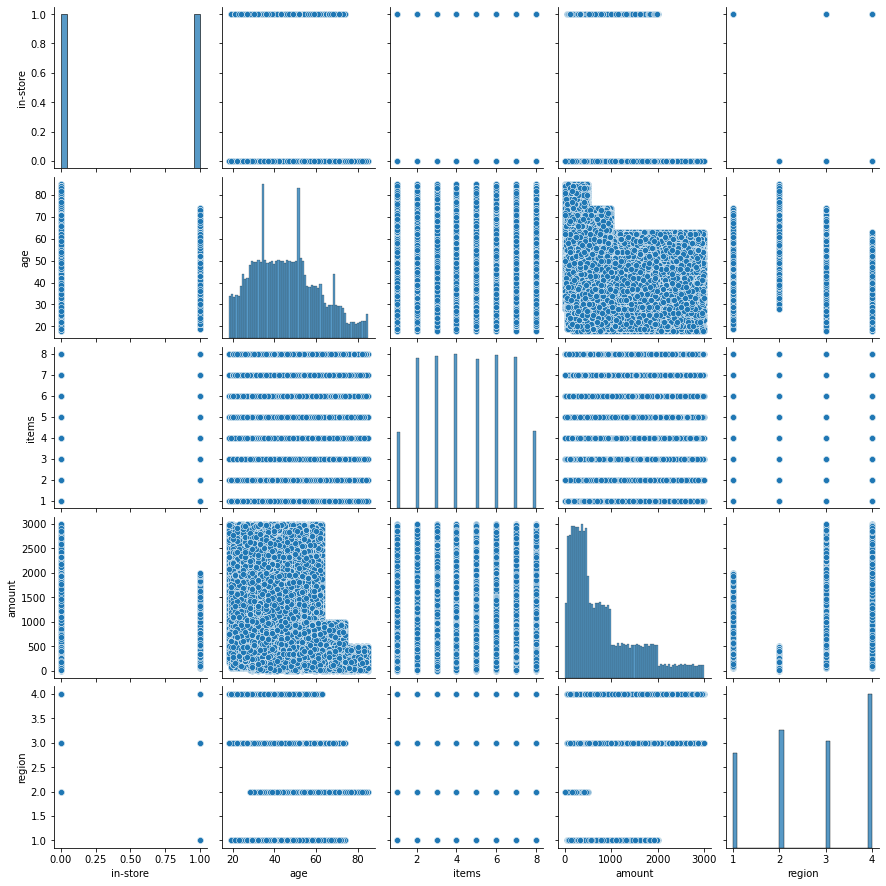

In [9]:
#Pair plot using Seaborn - very useful visualization 
sns.pairplot(data)

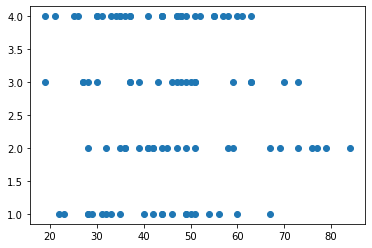

In [10]:
#Scatter plot b/w age and region 
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['region']
plt.scatter(x,y, marker='o')
plt.show()

## Splitting your data to fit any machine learning model

### Preparing the data
### You will  learn how to separate your data set into features and target variable, and then further split it into test and train parts. And all of this just with few lines of code, elegant and simple.

In [11]:
x_data = data[['in-store', 'age', 'amount']]
y_data = data['region']

In [13]:
x_data

,in-store,age,amount
0,0,37,281.03
1,0,35,219.51
2,1,45,1525.70
3,1,46,715.25
4,1,33,1937.50
...,...,...,...
79995,1,71,558.82
79996,0,59,1932.00
79997,0,54,414.16
79998,1,49,335.32


In [14]:
y_data

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 80000, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)

In [20]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = linear_regression_model.predict(x_test)

## Intro to Sci-kit learn 
### Data Structure

In [27]:
#sklearn.datasets.load_digits(*, n_class=10, return_X_y=False, as_frame=False)[source]¶ 
#Load and return the digits dataset (classification).
#Each datapoint is a 8x8 image of a digit.

digits = load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [28]:
print(digits.data.shape)

(1797, 64)


In [29]:
plt.gray() 

<Figure size 432x288 with 0 Axes>

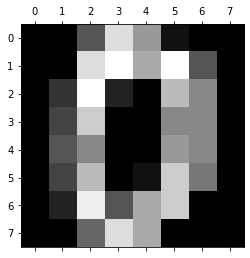

In [30]:
plt.matshow(digits.images[0]) 

In [32]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Selecting Data 

In [35]:
#select data in Python by using indices
data.iloc[:,3]

0         281.03
1         219.51
2        1525.70
3         715.25
4        1937.50
          ...   
79995     558.82
79996    1932.00
79997     414.16
79998     335.32
79999     527.12
Name: amount, Length: 80000, dtype: float64

### Slicing 

In [36]:
# select first 3 rows 
#Slicing using the [ ] operator selects a set of rows and/or columns from a Data
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4


In [40]:
# selecting columns using Pandas
#Why do you think 5 columns were selected instead of just 4 as indicated? 
# Its printing the index also. right? 
A = data.iloc[:,0:4]
print(A)

       in-store  age  items   amount
0             0   37      4   281.03
1             0   35      2   219.51
2             1   45      3  1525.70
3             1   46      3   715.25
4             1   33      4  1937.50
...         ...  ...    ...      ...
79995         1   71      3   558.82
79996         0   59      7  1932.00
79997         0   54      1   414.16
79998         1   49      4   335.32
79999         1   30      1   527.12

[80000 rows x 4 columns]


In [41]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [42]:
#dependent variable
y = data['region']